In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("tableau-colorblind10")
%matplotlib inline
import seaborn as sns

In [2]:
# Read in dataset
df = pd.read_csv('BADS_WS1920_known.csv')
df.head()

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return
0,1,2016-06-22,2016-06-27,643,38,navy,30,49.90,30822,Mrs,1969-04-17,Saxony,2016-06-23,0
1,2,2016-06-22,NaN,337,152,grey,30,19.95,30822,Mrs,1969-04-17,Saxony,2016-06-23,0
2,3,2016-06-22,2016-06-27,270,xxl,grey,49,79.90,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,1
3,4,2016-06-22,2016-06-27,142,xxl,grey,49,99.90,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,0
4,5,2016-06-22,2016-06-27,561,xxl,grey,3,14.90,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,1


In [3]:
len(df["order_item_id"].unique())

100000

In [4]:
# Get dimensions of df and check if data has missing values
print(df.shape)
df.info()

(100000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_item_id  100000 non-null  int64  
 1   order_date     100000 non-null  object 
 2   delivery_date  90682 non-null   object 
 3   item_id        100000 non-null  int64  
 4   item_size      100000 non-null  object 
 5   item_color     100000 non-null  object 
 6   brand_id       100000 non-null  int64  
 7   item_price     100000 non-null  float64
 8   user_id        100000 non-null  int64  
 9   user_title     100000 non-null  object 
 10  user_dob       91275 non-null   object 
 11  user_state     100000 non-null  object 
 12  user_reg_date  100000 non-null  object 
 13  return         100000 non-null  int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 10.7+ MB


In [5]:
# Get basic descriptive stats of numeric variables
df.describe().round(3)

,order_item_id,item_id,brand_id,item_price,user_id,return
count,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000
mean,50000.500,923.782,30.149,65.065,27169.074,0.458
std,28867.658,702.569,28.180,47.992,14053.418,0.498
min,1.000,1.000,1.000,0.000,9.000,0.000
25%,25000.750,214.000,5.000,29.900,14937.000,0.000
50%,50000.500,812.000,25.000,49.900,31189.000,0.000
75%,75000.250,1581.000,44.000,79.900,38917.250,1.000
max,100000.000,2241.000,138.000,999.000,48241.000,1.000


order_item_id, item_id, brand_id and user_id are technically all nominal categorical variables.

We'll likely encode item_id and brand_id, and we may use user_id for clustering or to predict by user.

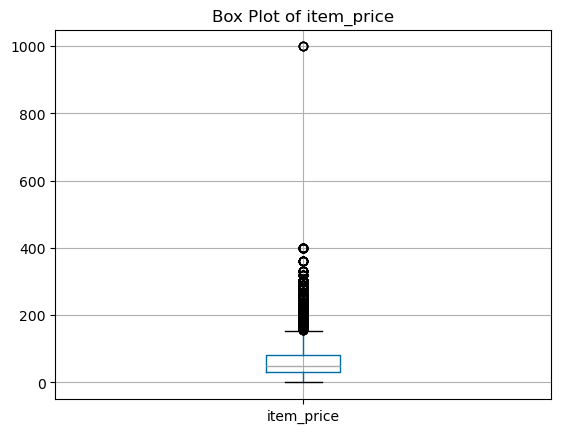

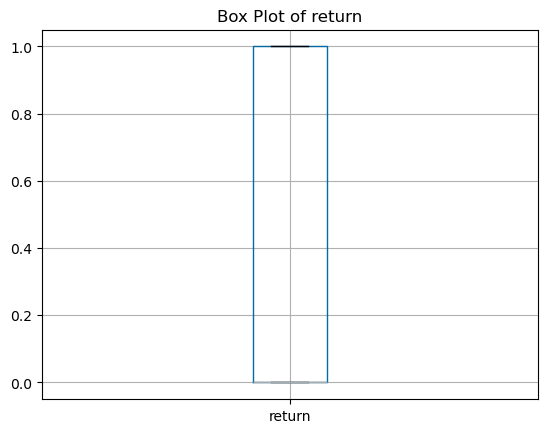

In [6]:
# Create box plots for the other  numberical variables - return and item_price
# Columns_to_plot = ['item_price', 'return']
for x in ['item_price', 'return']:
  plt.title('Box Plot of ' + x)
  df[[x]].boxplot()
  plt.show()


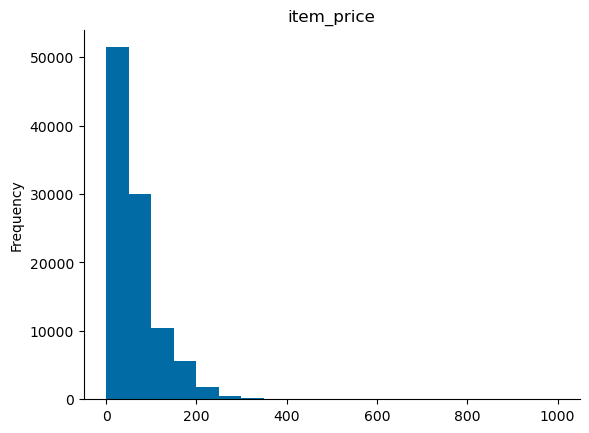

In [7]:
df['item_price'].plot(kind='hist', bins=20, title='item_price')
plt.gca().spines[['top', 'right',]].set_visible(False)

**Check Legitimacy of Delivery Date**

If the product has not been delivered, then it is likely return was assumed to be = 0. This means that we should drop these rows as it will reduce the effectiveness of our model.

If instead, we find that products without a delivery date have occurences where return = 1, then we can assume it is simply missing data.

In [8]:
result = 'Products have not been delivered, therefore they cannot be returned.'

for idx, row in df[df['delivery_date'].isnull()].iterrows():
  if row['return'] == 1:
    result = 'Products may not have recorded delivery date, some products have been returned.'
    break

print(result)

Products have not been delivered, therefore they cannot be returned.


In [9]:
df

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return
0,1,2016-06-22,2016-06-27,643,38,navy,30,49.90,30822,Mrs,1969-04-17,Saxony,2016-06-23,0
1,2,2016-06-22,NaN,337,152,grey,30,19.95,30822,Mrs,1969-04-17,Saxony,2016-06-23,0
2,3,2016-06-22,2016-06-27,270,xxl,grey,49,79.90,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,1
3,4,2016-06-22,2016-06-27,142,xxl,grey,49,99.90,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,0
4,5,2016-06-22,2016-06-27,561,xxl,grey,3,14.90,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,2016-09-11,2016-09-12,156,20,blue,34,29.90,713,Mrs,1959-03-21,Rhineland-Palatinate,2015-02-17,0
99996,99997,2016-09-11,2016-09-12,156,20,brown,34,29.90,713,Mrs,1959-03-21,Rhineland-Palatinate,2015-02-17,0
99997,99998,2016-09-11,1994-12-31,1832,xxl,black,37,26.90,47794,Mr,1985-03-01,Hamburg,2016-09-10,0
99998,99999,2016-09-11,1994-12-31,1832,xxl,black,37,26.90,47794,Mr,1985-03-01,Hamburg,2016-09-10,0


In [10]:
# Drop Rows with NaN 'delivery_date' values
df2 = df[df['delivery_date'].notnull()]

**Checking for Skewness for Numeric Variable 'item_price'**

item_price    1.909896
dtype: float64


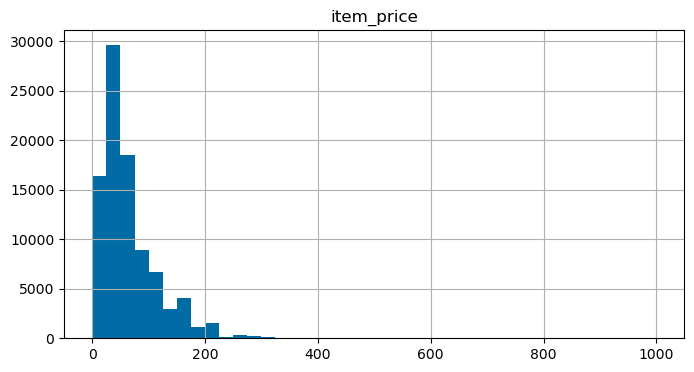

In [11]:
# Check for Skewness
print(df2[['item_price']].skew())
df2[['item_price']].hist(bins=40, figsize=(8,4))
plt.show()

In [12]:
# Size of items where price = 0
print('No. of Unsized Items:', df2[df2['item_size'] == 'unsized'].shape[0])
df2[df2['item_price'] == 0].groupby('item_size')['item_size'].count()

No. of Unsized Items: 4760


item_size
40           1
unsized    324
Name: item_size, dtype: int64

In [13]:
# Look at distribution of unsized items
df2[(df2['item_size'] == 'unsized') & (df2['item_price'] != 0)]['item_price'].describe()

count    4436.000000
mean       31.639511
std        32.462578
min         3.400000
25%        14.900000
50%        24.900000
75%        49.900000
max       999.000000
Name: item_price, dtype: float64

In [14]:
# Fill unsized items = 0 with median
df2.loc[(df2['item_size'] == 'unsized') & (df2['item_price'] == 0), 'item_price'] = np.NaN
df2.loc[(df2['item_size'] == 'unsized') & (df2['item_price'].isnull()), 'item_price'] = df2.loc[df2['item_size'] == 'unsized', 'item_price'].median()
df2[df2['item_price'] == 0].groupby('item_size')['item_size'].count()

item_size
40    1
Name: item_size, dtype: int64

In [15]:
# Drop remaining item with price = 0
print('Missing/Weird Price Entries:', df2[df2['item_price'] == 0].shape[0])
df3 = df2[df2['item_price'] != 0]
df3.shape

Missing/Weird Price Entries: 1


(90681, 14)

In [16]:
# Apply Log Transformation to 'item_price'
print(df3['item_price'].skew())
df3['log_item_price'] = np.log(df3['item_price'])
df3[['log_item_price']].skew()

1.9230709492864455


/var/folders/4f/3w_37fps2jl_9bqnhfpl8d8h0000gn/T/ipykernel_41598/2410408170.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['log_item_price'] = np.log(df3['item_price'])


log_item_price   -0.188681
dtype: float64

**Convert Date columns into Date type**

In [17]:
df4 = df3.copy()

# Change str to datetime
df4['order_date'] = pd.to_datetime(df4['order_date'], format='%Y-%m-%d')
df4['delivery_date'] = pd.to_datetime(df4['delivery_date'], format='%Y-%m-%d')
df4['user_dob'] = pd.to_datetime(df4['user_dob'], format='%Y-%m-%d') # Note, some DOB is missing, need to interpolate
df4['user_reg_date'] = pd.to_datetime(df4['user_reg_date'], format='%Y-%m-%d')

type(df4['order_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

Get the age of the user

In [18]:
# Define a function to calculate age
def calculate_age(dob, order_date):
    try:
        age = (order_date - dob).days//365
        return age
    except TypeError:  # Handle NaT values
        return None

# Lambda function
df4['age'] = df4.apply(lambda row: calculate_age(row['user_dob'], row['order_date']), axis=1)
df4['age'].sample(5)

44911    49.0
22160    52.0
32691     NaN
84298    38.0
60712    41.0
Name: age, dtype: float64

Get the waiting time for delivery

In [19]:
# Define a function to calculate waiting time
def calculate_wait(order_date, delivery_date):
  wait = (delivery_date - order_date).days

  #if wait < 0: # Some observations with negative waiting time
    #print((delivery_date, order_date))
    #wait = 0

  return wait

# Lambda function
df4['delivery_days'] = df4.apply(lambda row: calculate_wait(row['order_date'], row['delivery_date']), axis=1)
df4['delivery_days'].sample(5)

73304    11
55648     1
35027     5
69882     1
58290     3
Name: delivery_days, dtype: int64

In [20]:
print(df4[df4['delivery_days'] < 0]['delivery_days'].unique())

# 'delivery_date' is incorrect for 1072 entries
# Between June and September, and date is set to 1994-12-31
df4[df4['delivery_days'] < 0]

[-7845 -7847 -7846 -7848 -7849 -7850 -7851 -7852 -7853 -7854 -7855 -7856
 -7857 -7858 -7859 -7861 -7862 -7863 -7864 -7865 -7866 -7867 -7868 -7869
 -7870 -7871 -7872 -7873 -7874 -7875 -7876 -7877 -7878 -7879 -7880 -7881
 -7882 -7883 -7884 -7885 -7886 -7887 -7889 -7888 -7890 -7891 -7892 -7893
 -7894 -7895 -7896 -7897 -7898 -7899 -7900 -7901 -7902 -7903 -7904 -7905
 -7906 -7907 -7908 -7909 -7910 -7911 -7912 -7913 -7914 -7915 -7916 -7917
 -7918 -7919 -7920 -7921 -7922 -7923 -7924 -7925]


,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return,log_item_price,age,delivery_days
286,287,2016-06-23,1994-12-31,4,7,grey,4,79.90,14779,Mrs,1964-10-16,Thuringia,2016-02-06,0,4.380776,51.0,-7845
287,288,2016-06-23,1994-12-31,4,7+,grey,4,79.90,14779,Mrs,1964-10-16,Thuringia,2016-02-06,0,4.380776,51.0,-7845
288,289,2016-06-23,1994-12-31,269,l,brown,42,59.90,14779,Mrs,1964-10-16,Thuringia,2016-02-06,0,4.092677,51.0,-7845
788,789,2016-06-25,1994-12-31,415,41,grey,1,89.90,29174,Mrs,1963-12-01,Berlin,2016-06-17,1,4.498698,52.0,-7847
789,790,2016-06-25,1994-12-31,415,42,blue,1,89.90,29174,Mrs,1963-12-01,Berlin,2016-06-17,1,4.498698,52.0,-7847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99838,99839,2016-09-11,1994-12-31,1613,41,anthracite,1,199.90,48216,Mr,1954-05-05,Mecklenburg-Western Pomerania,2015-09-15,0,5.297817,62.0,-7925
99839,99840,2016-09-11,1994-12-31,1613,41,black,1,199.90,48216,Mr,1954-05-05,Mecklenburg-Western Pomerania,2015-09-15,0,5.297817,62.0,-7925
99927,99928,2016-09-11,1994-12-31,71,9+,ocher,21,49.95,45237,Mrs,1986-03-29,Berlin,2016-08-28,1,3.911023,30.0,-7925
99997,99998,2016-09-11,1994-12-31,1832,xxl,black,37,26.90,47794,Mr,1985-03-01,Hamburg,2016-09-10,0,3.292126,31.0,-7925


In [21]:
# Look at distribution of 'delivery_days'
df4[df4['delivery_days'] >= 0]['delivery_days'].describe()

count    89609.000000
mean         7.401734
std         13.492687
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max        173.000000
Name: delivery_days, dtype: float64

In [22]:
# Fill negative 'delivery_days' with median
df4.loc[df4['delivery_days'] < 0, 'delivery_days'] = np.NaN
df4.loc[df4['delivery_days'].isnull(), 'delivery_days'] = df4.loc[df4['delivery_days'] >= 0, 'delivery_days'].median()
df4[df4['delivery_days'] >= 0]['delivery_days'].describe()

count    90681.000000
mean         7.349698
std         13.421131
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max        173.000000
Name: delivery_days, dtype: float64

**Get Number of Items per Order**

In [23]:
df5 = df4.copy()

# Check for duplicates
print(df5.shape)
len(df5['order_item_id'].unique())

(90681, 17)


90681

In [24]:
# Append the count of items by 'user_id' and 'order_date' to df
df5['no_items'] = df5.groupby(['user_id', 'order_date'])['order_item_id'].transform('count')
df5.sample(5)

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return,log_item_price,age,delivery_days,no_items
99165,99166,2016-09-09,2016-09-12,1855,xl,blue,29,89.9,48081,Mrs,1964-09-30,Brandenburg,2015-12-16,0,4.498698,51.0,3.0,5
84052,84053,2016-08-27,2016-08-28,1832,m,blue,37,26.9,42303,Mrs,1983-12-18,Hesse,2016-08-13,0,3.292126,32.0,1.0,3
98950,98951,2016-09-10,2016-09-11,1546,xxl,mocca,3,29.9,202,Mrs,1959-04-13,Bavaria,2015-02-17,0,3.397858,57.0,1.0,7
18732,18733,2016-06-30,2016-07-03,4,5,grey,4,64.9,33942,Mrs,1971-12-05,Saxony,2016-02-06,1,4.172848,44.0,3.0,5
2994,2995,2016-06-25,2016-06-27,118,xl,berry,6,49.9,15117,Mrs,1965-04-30,Hesse,2016-06-26,1,3.910021,51.0,2.0,1


**Check if any of the new numeric variables require transformation**

age              2.216869
delivery_days    3.798904
no_items         2.768434
dtype: float64


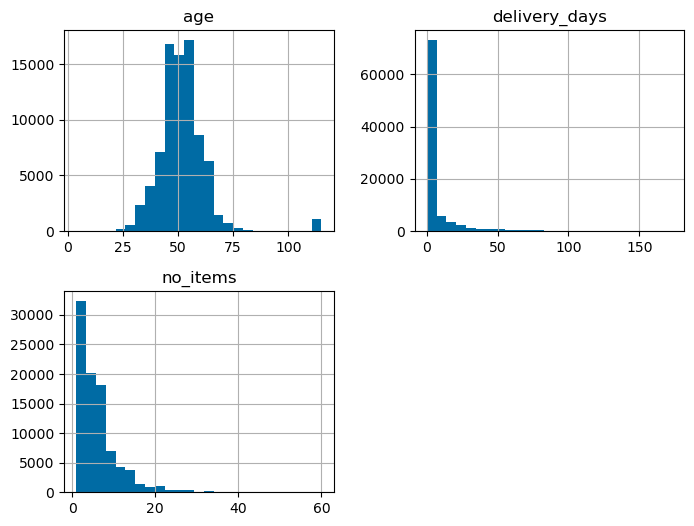

In [25]:
# Check for skewness
print(df5[['age', 'delivery_days', 'no_items']].skew())
df5[['age', 'delivery_days', 'no_items']].hist(bins=25, figsize=(8,6))
plt.show()

In [26]:
# Apply Log Transformation to 'age', 'delivery_days', and 'no_items'
df5['log_age'] = np.log(df5['age'])
df5['log_delivery_days'] = np.log(df5['delivery_days']+0.01) # Add 0.01 to account for delivery days = 0
df5['log_no_items'] = np.log(df5['no_items'])
df5[['log_age', 'log_delivery_days', 'log_no_items']].skew()

log_age             -0.185663
log_delivery_days    0.376745
log_no_items        -0.077277
dtype: float64

**Cleaning up 'item_size'**

There is a need to standardise the scale and sizings to something consistent.

These are the types of labellings in the data:
1. Int (could be size, could be waist, could be waist length, could be height)
2. Int+
3. Str

In [27]:
df6 = df5.copy()

# Look at unique values for item_size
df6['item_size'].unique()

array(['38', 'xxl', '41', '50', 'l', '48', 'xl', '42', '43', '9', '8+',
       'unsized', 'm', 's', '40', '40+', '6+', '10', '8', '7', '44', '37',
       '36', '39', '21', '18', '7+', '20', '5+', '46', '6', '19', '4',
       '5', '35', '31', '152', '38+', '29', '34', '3', '30', '4+', '45',
       '24', '41+', '39+', '23', '140', '26', '9+', '3632', '4032', '10+',
       '1', '36+', '11', '28', '11+', '22', '116', '25', '37+', '128',
       '176', '12', '42+', '3432', '164', '52', '33', '32', '14', 'xxxl',
       '27', '104', '13', '3+', '47', '56', '54', 'xs', '3332', '46+',
       '2', '80', '45+', '90', '3832', '3634', '44+', '43+', '2+', '100',
       '3132', '58', '4034', '84', '3834', '12+'], dtype=object)

In [28]:
# Take sizes with + as the value + 1
count = 0
for idx, row in df6[df6['item_size'].str.contains('+', regex=False)].iterrows():
  df6.loc[idx, 'item_size'] = str(int(row['item_size'][:-1]) + 1)
  count += 1

print("Rows edited:", count)

Rows edited: 2357


In [29]:
# Dummy function that returns size based on values specified
def transform_size(x, size_val, size=['xxs', 'xs', 's', 'm', 'l', 'xl', 'xxl', 'xxxl']):
  if x <= size_val[0]:
    return size[0]
  elif x <= size_val[1]:
    return size[1]
  elif x <= size_val[2]:
    return size[2]
  elif x <= size_val[3]:
    return size[3]
  elif x <= size_val[4]:
    return size[4]
  elif x <= size_val[5]:
    return size[5]
  elif x <= size_val[6]:
    return size[6]
  else:
    return size[7]

In [30]:
# It is possible that other labels with pants length could also be pants, so we generalise the sizing based on waist
# Convert Pant Sizes
size_val = [24, 27, 30, 33, 36, 39, 42]
count = 0

for idx, row in df6[(df6['item_size'].str.len() == 4) & (df6['item_size'].str.isnumeric())].iterrows():
  df6.loc[idx, 'item_size'] = transform_size(int(row['item_size'][:2]), size_val)
  count += 1

print("Rows converted:", count)

Rows converted: 92


In [31]:
# Assume that 3 digit values are by height, and categorise heights below 140cm as xxs
# Convert Height Sizes
size_val = [140, 150, 160, 165, 170, 175, 180]
size = ['child', 'xxs', 'xs', 's', 'm', 'l', 'xl', 'xxl']
count = 0

for idx, row in df6[(df6['item_size'].str.len() == 3) & (df6['item_size'].str.isnumeric())].iterrows():
  if int(row['item_size']) <= 100:
    pass
  else:
    df6.loc[idx, 'item_size'] = transform_size(int(row['item_size']), size_val, size)
    count += 1

print("Rows converted:", count)

Rows converted: 392


In [32]:
# Assume 80, 90 and 100 are chest sizes representing S, M and L
# Convert Chest Sizes
size_val = [78, 79, 80, 90, 100, 101, 101, 101]
count = 0

for idx, row in df6[(df6['item_size'].str.len() <= 3) & (df6['item_size'].str.isnumeric())].iterrows():
  if int(row['item_size']) < 80:
    pass
  else:
    df6.loc[idx, 'item_size'] = transform_size(int(row['item_size']), size_val)
    count += 1

print("Rows converted:", count)

Rows converted: 28


In [33]:
# Assume that values from 34 onwards are chest sizes
# Convert Chest Sizes
size_val = [38, 40, 42, 44, 46, 48, 50]
count = 0

for idx, row in df6[(df6['item_size'].str.len() == 2) & (df6['item_size'].str.isnumeric())].iterrows():
  if int(row['item_size']) < 34:
    pass
  else:
    df6.loc[idx, 'item_size'] = transform_size(int(row['item_size']), size_val)
    count += 1

print("Rows converted:", count)

Rows converted: 36775


In [34]:
# Assume that values between 26 and 32 are waist sizes (it is possible 34 to 38 could also be waist sizes)
# Convert Waist Sizes
size_val = [26, 28, 30, 32, 32, 32, 32]
count = 0

for idx, row in df6[(df6['item_size'].str.len() == 2) & (df6['item_size'].str.isnumeric())].iterrows():
  if int(row['item_size']) < 26:
    pass
  else:
    df6.loc[idx, 'item_size'] = transform_size(int(row['item_size']), size_val)
    count += 1

print("Rows converted:", count)

Rows converted: 947


In [35]:
# Assume that remaining values are shoe/dress/child sizes
# Convert Remaining Sizes
size_val = [4, 6, 8, 10, 12, 14, 14]
size = ['xxs', 'xs', 's', 'm', 'l', 'xl', 'xxl', 'child']
count = 0

for idx, row in df6[(df6['item_size'].str.len() <= 2) & (df6['item_size'].str.isnumeric())].iterrows():
  df6.loc[idx, 'item_size'] = transform_size(int(row['item_size']), size_val, size)
  count += 1

print("Rows converted:", count)

Rows converted: 4859


In [36]:
# Check that all values have been re-categorised
df6['item_size'].unique()

array(['xxs', 'xxl', 's', 'l', 'xl', 'm', 'unsized', 'xs', 'child',
       'xxxl'], dtype=object)

**Add extra features for the KNN Model**

May use these features for predictive model too.

In [37]:
df7 = df6.copy()

# Days since registration and order for each user
df7['days_since_reg'] = (df7['order_date'] - df7['user_reg_date']).dt.days
df7['days_since_reg'] = df7['days_since_reg'].apply(lambda x: max(x, 0))

# if 'days_since_reg' in df7.columns:  # Check if 'days_since_reg' column exists
#     df7['new_user'] = 0  # Initialize 'new_user' column with 0

#     # Assign 1 to rows where 'days_since_reg' is less than median
#     df7.loc[df7['days_since_reg'] < df7['days_since_reg'].median(), 'new_user'] = 1

###############################################################################################

# Group the data by user_id and calculate the total cost of goods purchased for each user
user_total_cost = df7.groupby('user_id')['log_item_price'].transform('sum')

# Calculate the average total cost of goods purchased per person
average_total_cost_per_person = user_total_cost.mean()

df7['log_average_total_cost_per_person'] = user_total_cost

###############################################################################################

# Group the data by user_id and calculate the total number of items bought for each user
user_total_items = df7.groupby('user_id')['log_no_items'].transform('sum')

df7['log_total_items_per_person'] = user_total_items

df7.iloc[10]

order_item_id                                         12
order_date                           2016-06-22 00:00:00
delivery_date                        2016-06-27 00:00:00
item_id                                              212
item_size                                              l
item_color                                          grey
brand_id                                               5
item_price                                          39.9
user_id                                            30824
user_title                                           Mrs
user_dob                                             NaT
user_state                                  Lower Saxony
user_reg_date                        2016-06-23 00:00:00
return                                                 0
log_item_price                                  3.686376
age                                                  NaN
delivery_days                                        5.0
no_items                       

**Perform KNN to Interpolate Age**

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

df8 = df7.copy()
df8 = df8.dropna()

# Define features (X) and target variable (y)
X = df8[['item_size', 'item_id', 'item_color', 'brand_id', 'user_state', 'log_item_price', 'log_no_items', 'days_since_reg']]
y = df8['age']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, columns=['item_id', 'brand_id', 'item_color', 'user_state', 'item_size'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize the KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=3, weights='distance')

'''
With random_state = 42
k = 3: r2 = 0.68
k = 5: r2 = 0.58
k = 7: r2 = 0.49
k = 9: r2 = 0.44
k = 11: r2 = 0.40
k = 21: r2 = 0.27
'''

# Fit the model on the training data
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3, weights='distance')

In [39]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Predict the age for the test data
#y_pred = knn_regressor.predict(X_test)

# Calculate mean squared error
#mse = mean_squared_error(y_test, y_pred)
#print("Mean Squared Error:", mse)

# Calculate R-squared
#r_squared = r2_score(y_test, y_pred)
#print("R-squared:", r_squared)

In [40]:
#predicted_ages_df = pd.DataFrame(columns=['user_id', 'predicted_age'])

#unique_user_ids = pd.DataFrame(df7.loc[df7['age'].isnull(), 'user_id'].unique(), columns=['user_id'])

#user_data = df7.drop_duplicates(subset=['user_id'])[['item_size', 'item_id', 'item_color', 'brand_id', 'user_state', 'log_item_price', 'log_no_items', 'days_since_reg', 'log_average_total_cost_per_person', 'log_total_items_per_person']]

# Convert categorical variables to dummy variables
#user_data = pd.get_dummies(user_data, columns=['item_id', 'brand_id', 'item_color', 'user_state', 'item_size'])
#user_data = user_data.reindex(columns=X_train.columns, fill_value=0)

# Predict ages for all unique user IDs
#predicted_ages = knn_regressor.predict(user_data)

# Combine user IDs with predicted ages
#predicted_ages_df['user_id'] = unique_user_ids['user_id']
#predicted_ages_df['predicted_age'] = predicted_ages.round(0)

# Merge the predicted_ages_df with the original DataFrame to update the age column
#df7 = pd.merge(df7, predicted_ages_df, on='user_id', how='left')
#df7['age'] = df7['predicted_age'].combine_first(df7['age']).astype(int)


In [41]:
#df7.loc[df7['age'].isnull(), 'user_id'].unique()
#df7['user_id'].unique()

In [42]:
#df7.drop(columns=['predicted_age'], inplace=True)
#df7.iloc[10]

In [43]:
#df7.loc[df7['user_id'] == 30824]

Work on imputing missing values later. Results right now are subpar.

In [44]:
df8 = df7.dropna()
df8.shape

(82748, 24)

**Exploratory Data Analysis**

Analyse numeric variables

In [45]:
num_col = ['item_price', 'log_item_price', 'no_items', 'log_no_items', 'delivery_days', 'log_delivery_days', 'age', 'log_age']
df_numeric = df8[num_col]
print(df_numeric.skew())
df_numeric.describe()

item_price           1.947509
log_item_price      -0.185378
no_items             2.793738
log_no_items        -0.070537
delivery_days        3.810203
log_delivery_days    0.393247
age                  2.216869
log_age             -0.185663
dtype: float64


,item_price,log_item_price,no_items,log_no_items,delivery_days,log_delivery_days,age,log_age
count,82748.000000,82748.000000,82748.000000,82748.000000,82748.000000,82748.000000,82748.000000,82748.000000
mean,65.487478,3.941503,6.279209,1.535469,7.307717,1.237002,51.887163,3.928104
std,47.994016,0.709717,5.453751,0.788214,13.395493,1.102439,11.320325,0.203401
min,3.400000,1.223775,1.000000,0.000000,0.000000,-4.605170,4.000000,1.386294
25%,29.900000,3.397858,3.000000,1.098612,2.000000,0.698135,46.000000,3.828641
50%,49.900000,3.910021,5.000000,1.609438,3.000000,1.101940,51.000000,3.931826
75%,79.900000,4.380776,8.000000,2.079442,5.000000,1.611436,57.000000,4.043051
max,999.000000,6.906755,60.000000,4.094345,173.000000,5.153349,115.000000,4.744932


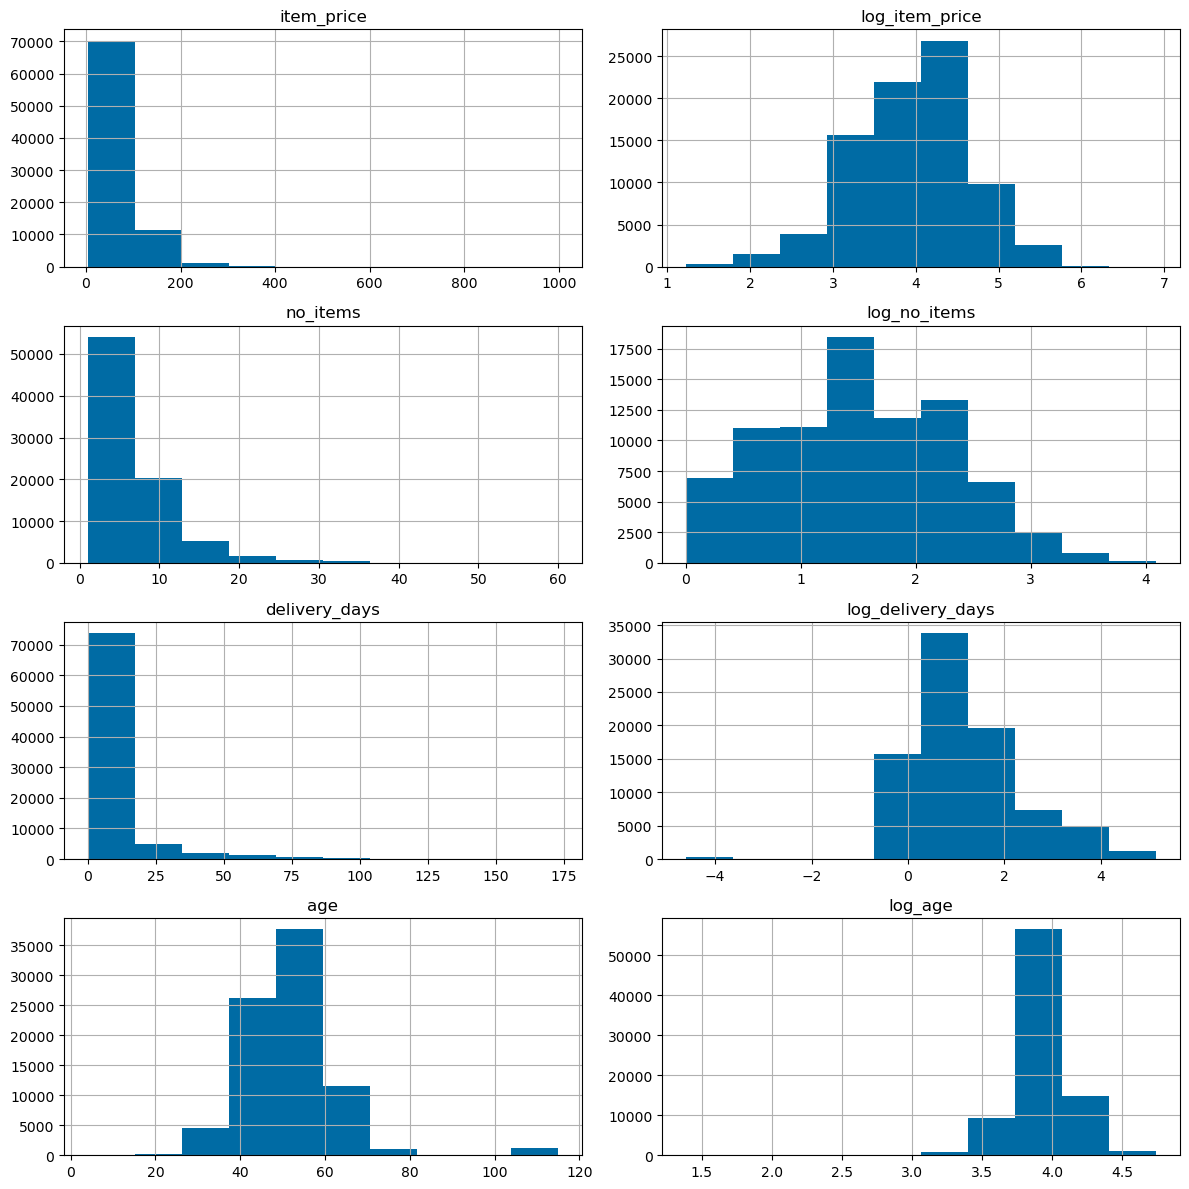

In [46]:
fig, (axes1, axes2, axes3, axes4) = plt.subplots(4, 2, figsize=(12,12))

df_numeric.hist('item_price', ax=axes1[0])
df_numeric.hist('log_item_price', ax=axes1[1])
df_numeric.hist('no_items', ax=axes2[0])
df_numeric.hist('log_no_items', ax=axes2[1])
df_numeric.hist('delivery_days', ax=axes3[0])
df_numeric.hist('log_delivery_days', ax=axes3[1])
df_numeric.hist('age', ax=axes4[0])
df_numeric.hist('log_age', ax=axes4[1])

plt.tight_layout()
plt.show()

Standardize numeric variables

In [47]:
# Prepare to use a package for standardization
from sklearn.preprocessing import StandardScaler

scale_col = ['log_item_price', 'log_no_items', 'log_delivery_days', 'log_age']

# Keep log variables
df_numeric_log = df_numeric[scale_col]

# Perform standardisation
scaler = StandardScaler()
scaler.fit(df_numeric_log)
numeric_scaled = scaler.transform(df_numeric_log)

In [48]:
# Create DataFrame for scaled numeric variables
df_numeric_scaled = pd.DataFrame(numeric_scaled, columns=['log_item_price', 'log_no_items', 'log_delivery_days', 'log_age'])
print(df_numeric_scaled.shape)
df_numeric_scaled.describe()

(82748, 4)


,log_item_price,log_no_items,log_delivery_days,log_age
count,8.274800e+04,8.274800e+04,8.274800e+04,8.274800e+04
mean,2.895478e-16,1.397935e-16,-1.054462e-16,-8.865899e-16
std,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00
min,-3.829336e+00,-1.948048e+00,-5.299346e+00,-1.249660e+01
25%,-7.660065e-01,-5.542396e-01,-4.887986e-01,-4.890002e-01
50%,-4.435846e-02,9.384437e-02,-1.225129e-01,1.829656e-02
75%,6.189453e-01,6.901375e-01,3.396431e-01,5.651282e-01
max,4.178104e+00,3.246443e+00,3.552459e+00,4.015867e+00


In [49]:
# Combine categorical variables with scaled numeric variables
print(df8.shape)
df9 = pd.concat([df8.drop(scale_col, axis=1).reset_index(drop=True), df_numeric_scaled], axis=1)
print(df9.shape)

(82748, 24)
(82748, 24)


Plotting

Numeric Variables

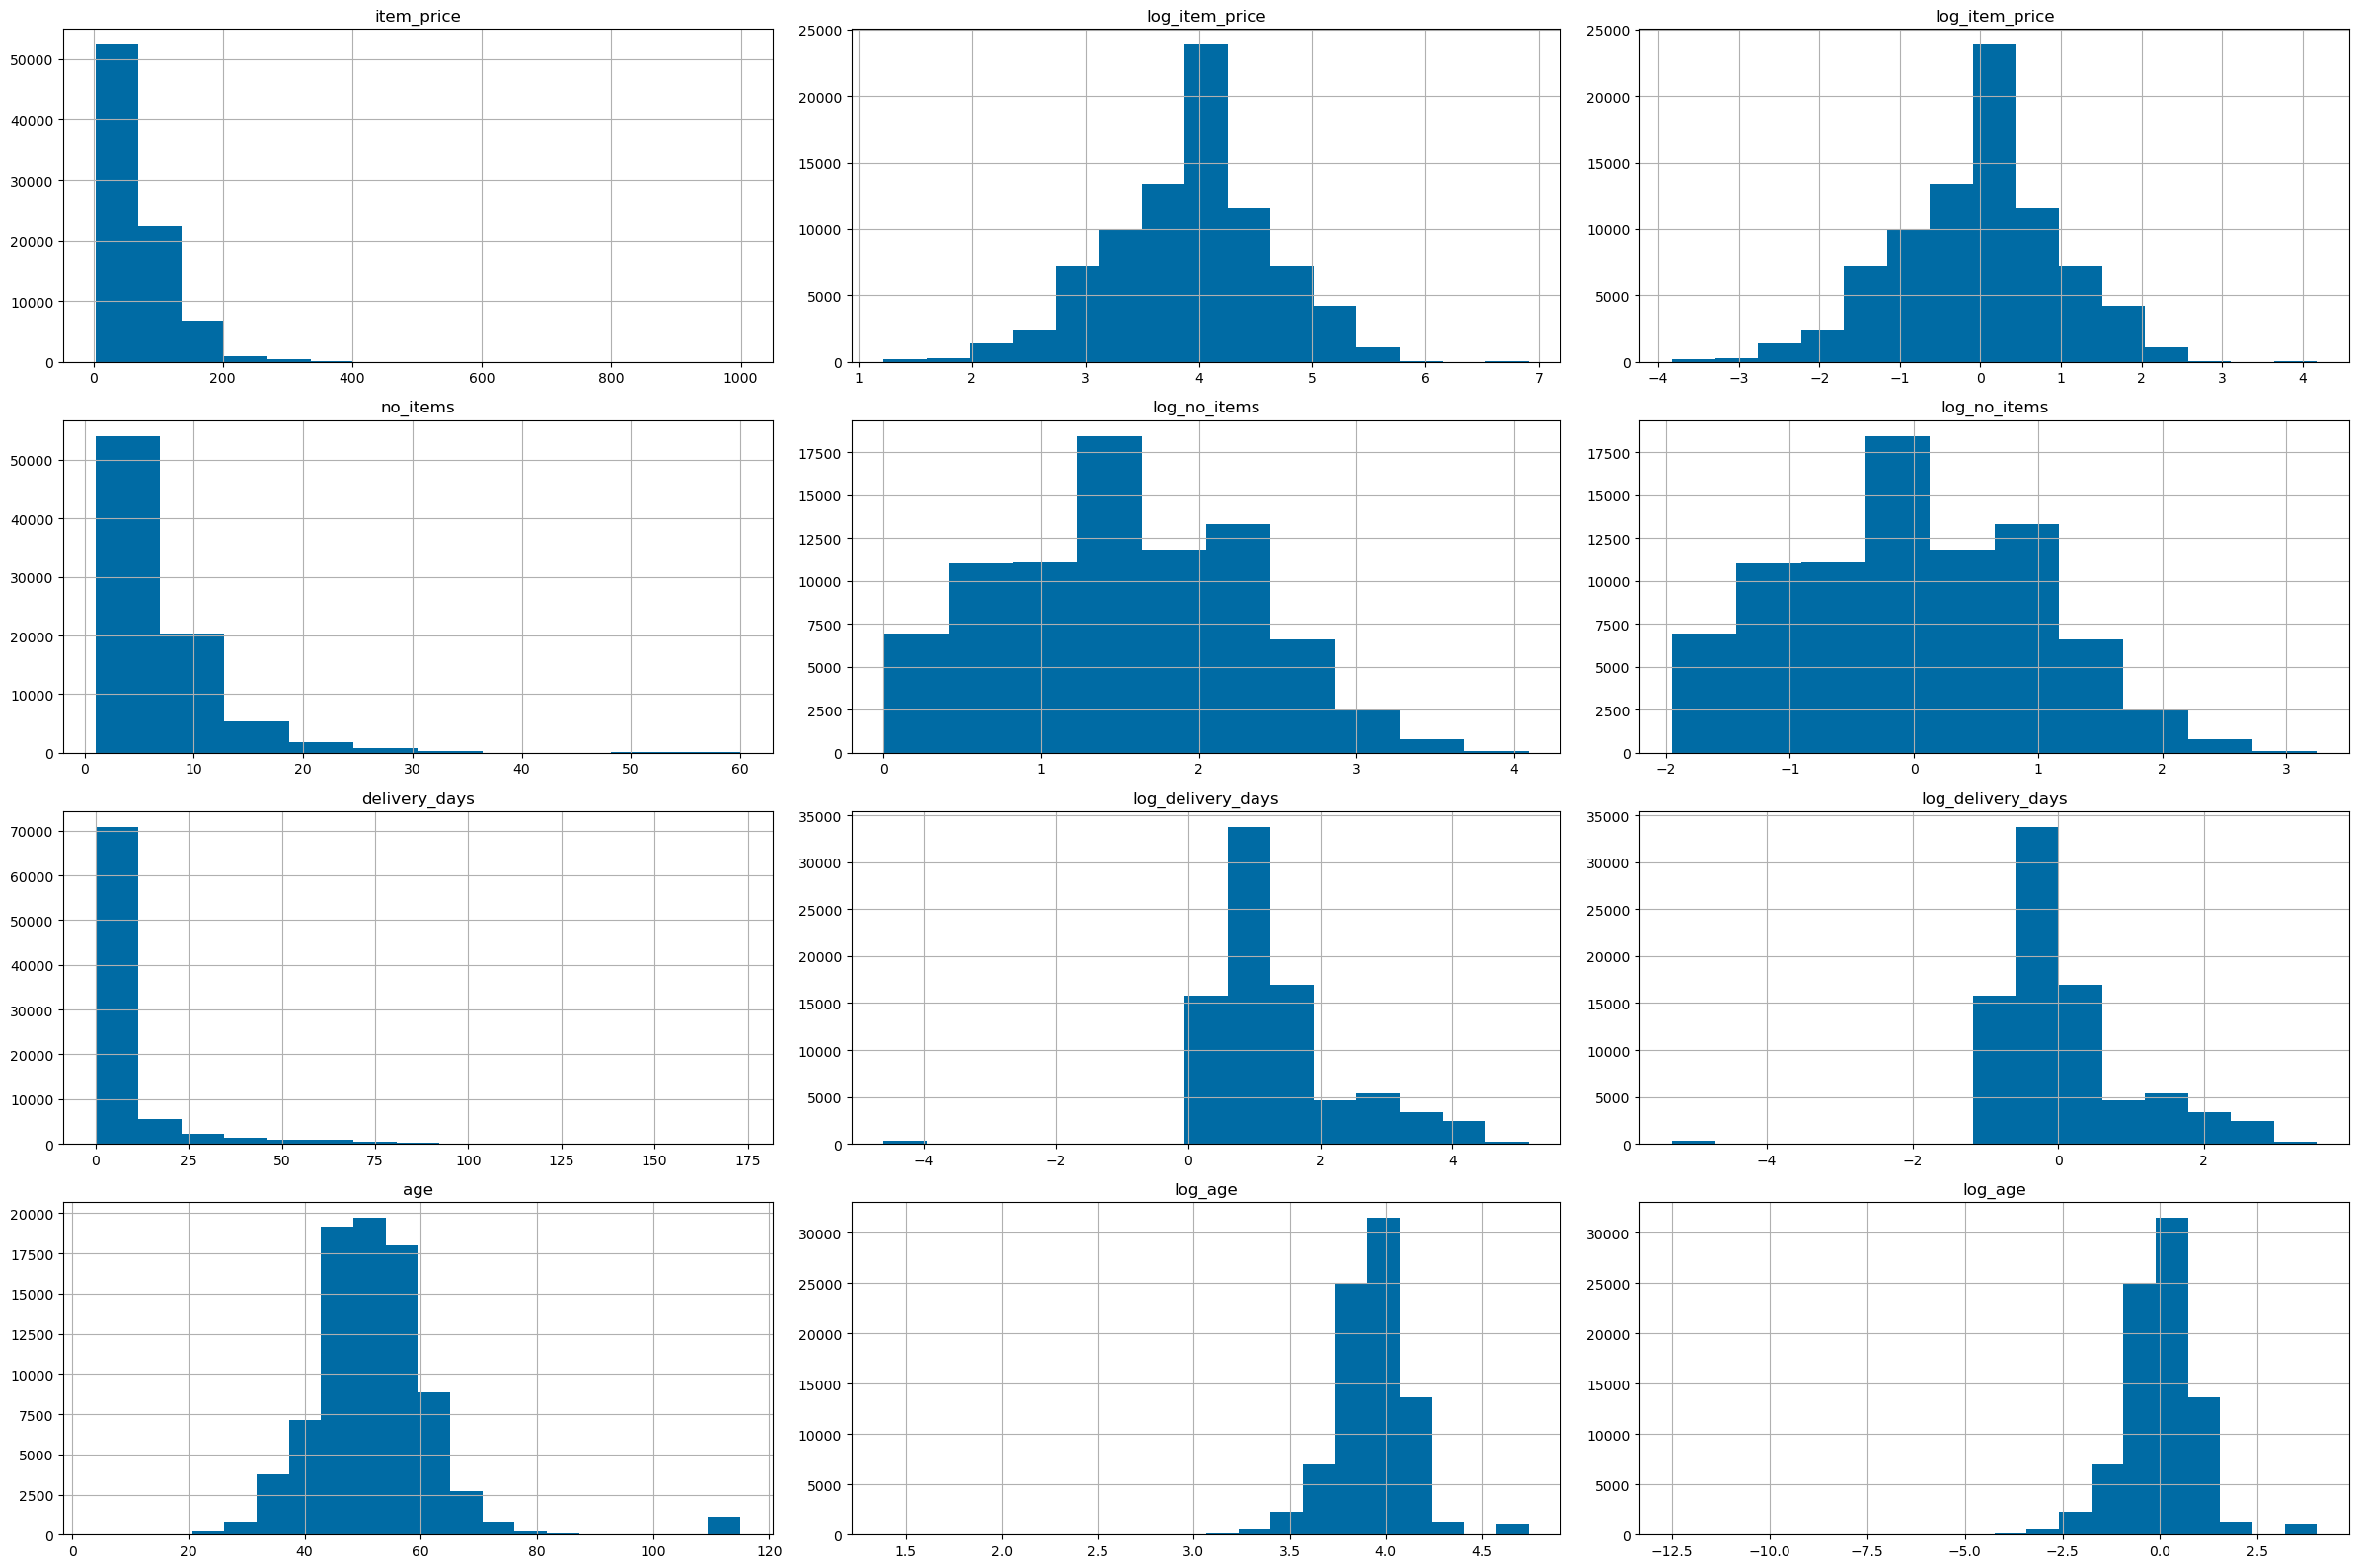

In [50]:
# Plot change in distribution of numeric variables
fig, (axes1, axes2, axes3, axes4) = plt.subplots(4, 3, figsize=(24,16))

df_numeric.hist('item_price', ax=axes1[0], bins=15)
df_numeric.hist('log_item_price', ax=axes1[1], bins=15)
df9.hist('log_item_price', ax=axes1[2], bins=15)
df_numeric.hist('no_items', ax=axes2[0], bins=10)
df_numeric.hist('log_no_items', ax=axes2[1], bins=10)
df9.hist('log_no_items', ax=axes2[2], bins=10)
df_numeric.hist('delivery_days', ax=axes3[0], bins=15)
df_numeric.hist('log_delivery_days', ax=axes3[1], bins=15)
df9.hist('log_delivery_days', ax=axes3[2], bins=15)
df_numeric.hist('age', ax=axes4[0], bins=20)
df_numeric.hist('log_age', ax=axes4[1], bins=20)
df9.hist('log_age', ax=axes4[2], bins=20)

plt.tight_layout()
plt.show()

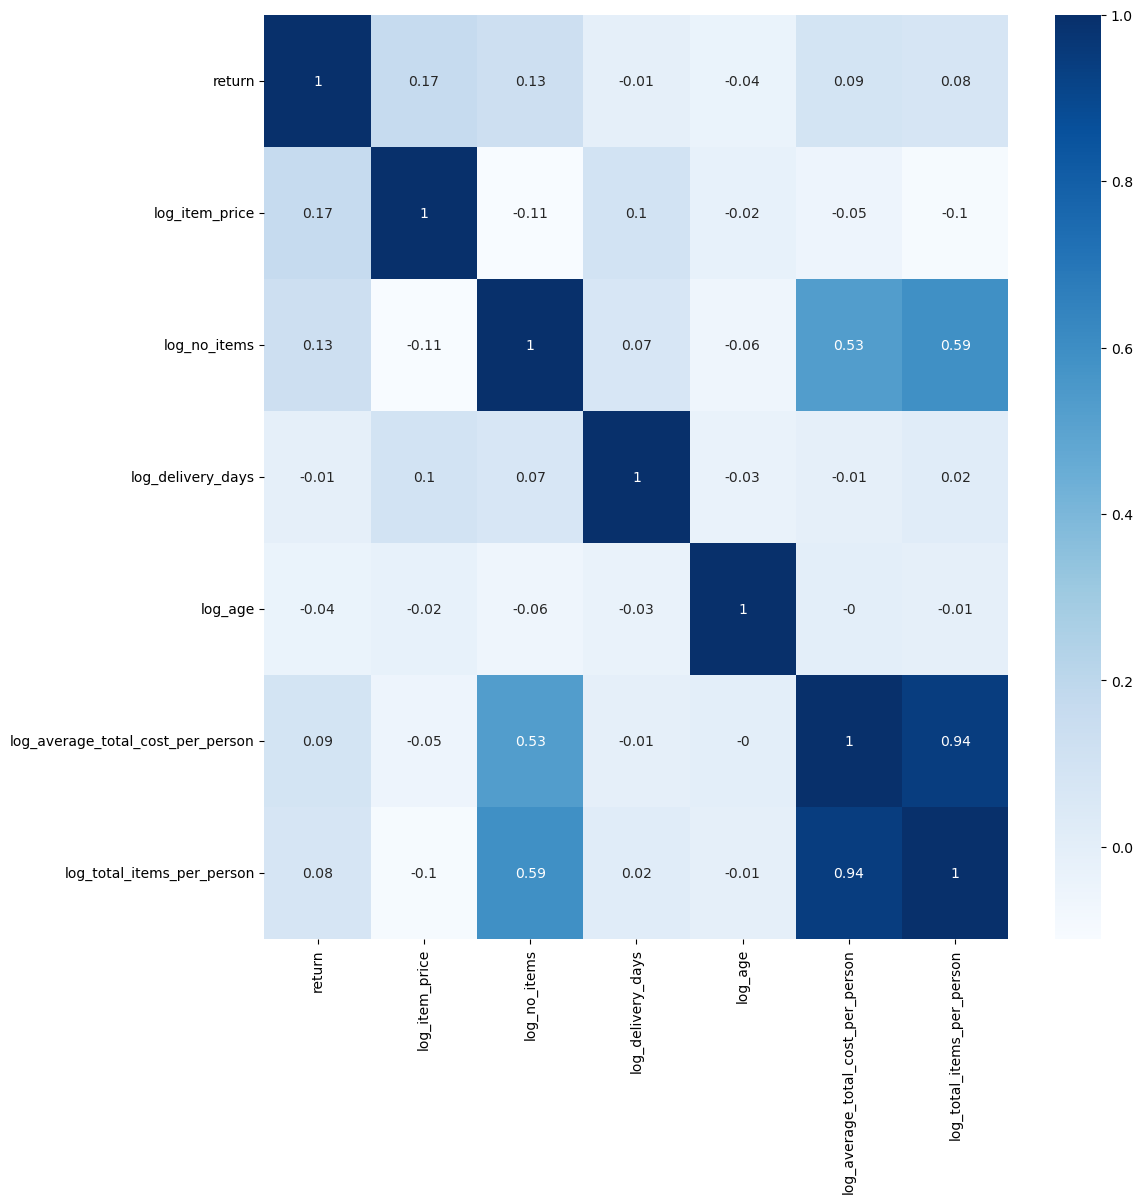

In [51]:
df_corr = df9[['return'] + scale_col + ['log_average_total_cost_per_person', 'log_total_items_per_person']].corr()

plt.figure(figsize=(12, 12))

sns.heatmap(round(df_corr,2), annot=True, fmt='g', cmap="Blues")
plt.show()

Categorical Variables

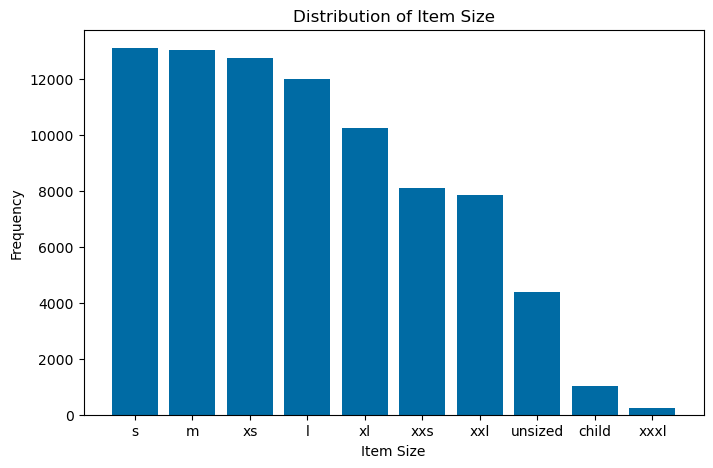

In [52]:
names = df9['item_size'].value_counts().keys()
counts = df9['item_size'].value_counts().values

plt.subplots(figsize=(8, 5))
plt.bar(names, counts)
plt.xlabel("Item Size")
plt.ylabel("Frequency")
plt.title("Distribution of Item Size")
plt.show()

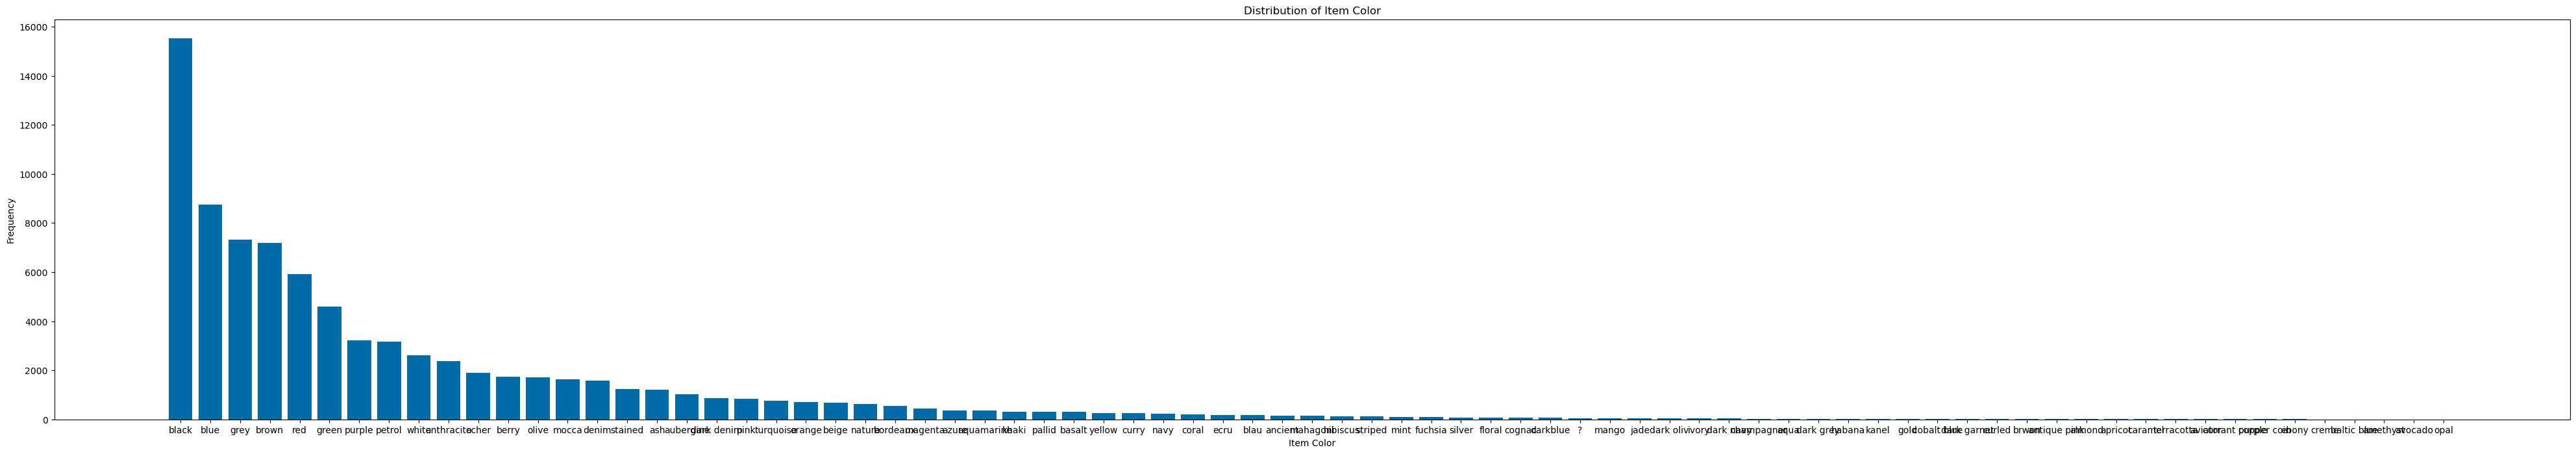

In [53]:
names = df9['item_color'].value_counts().keys()
counts = df9['item_color'].value_counts().values

plt.subplots(figsize=(50, 8))
plt.bar(names, counts)
plt.xlabel("Item Color")
plt.ylabel("Frequency")
plt.title("Distribution of Item Color")
plt.show()

In [54]:
# Export df for visualisation in Tableau
df9.to_csv('/content/drive/MyDrive/DM PROJECT GCOLLAB/output.csv', index=False)

One-Hot Encoding

In [55]:
# OHC categorical variables
df10 = pd.get_dummies(df9, columns=['item_id', 'brand_id', 'item_color', 'user_state', 'item_size', 'user_title'])
df10.drop(['order_item_id', 'order_date', 'delivery_date', 'user_dob', 'user_reg_date'], axis=1, inplace=True)

11.0


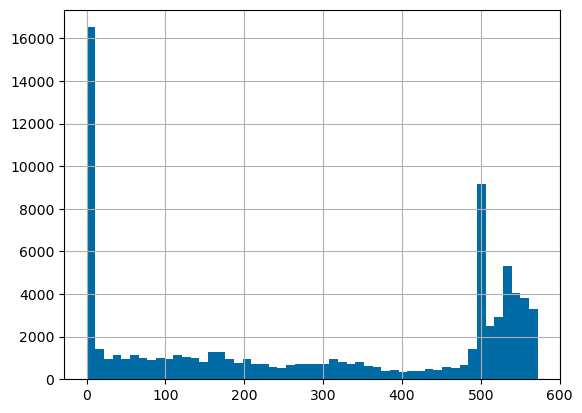

572

In [56]:
# Histogram of 'days_since_reg'
print(df10['days_since_reg'].max()/52)

df10['days_since_reg'].hist(bins=52)
plt.show()

df10['days_since_reg'].max()

No merit in keeping this as a numerical variable.

In [57]:
# OHC users based on 'days_since_reg'
df10['new_user'] = 0
df10['old_user'] = 0

df10.loc[df10['days_since_reg'] <= 11, 'new_user'] = 1
df10.loc[df10['days_since_reg'] >= 495, 'old_user'] = 1

df10.drop('days_since_reg', axis=1, inplace=True)

df10[['new_user', 'old_user']].sample(5)


,new_user,old_user
28812,0,1
7255,1,0
39134,0,0
72460,0,1
63263,0,1


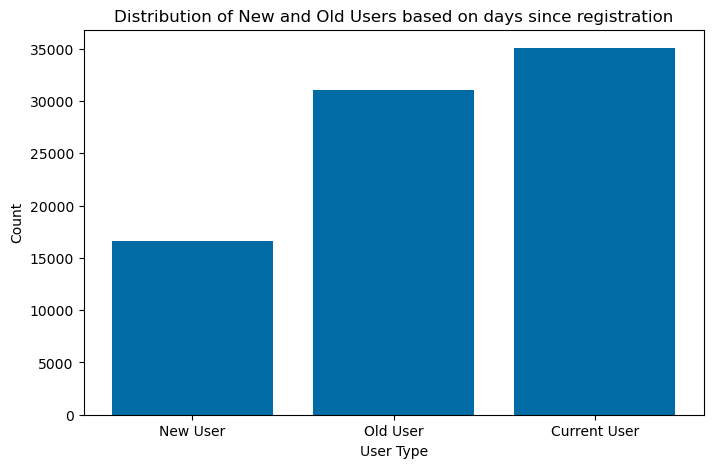

In [58]:
current_users_count = len(df10) - df10['new_user'].sum() - df10['old_user'].sum()

plt.figure(figsize=(8, 5))
plt.bar(['New User', 'Old User', 'Current User'], [df10['new_user'].sum(), df10['old_user'].sum(), current_users_count])
plt.xlabel('User Type')
plt.ylabel('Count')
plt.title('Distribution of New and Old Users based on days since registration')
plt.show()

Create user profile

In [59]:
up1 = df10[['user_id', 'age', 'log_average_total_cost_per_person']]
up2 = df10.drop(['age', 'log_age', 'log_average_total_cost_per_person', 'delivery_days', 'no_items', 'log_total_items_per_person', 'log_item_price', 'log_delivery_days'], axis=1)

In [60]:
up1 = up1.groupby('user_id').mean()
up2 = up2.groupby('user_id').sum()
up = pd.concat([up1, up2], axis=1)

from sklearn.ensemble import RandomForestRegressor

# To use this experimental feature, we need to explicitly ask for it:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import BayesianRidge, Ridge
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline

N_SPLITS = 5

rng = np.random.RandomState(0)

X_full = up.drop('age', axis=1).dropna()[::400].reset_index(drop=True)
y_full = up['age'].dropna()[::400].reset_index(drop=True)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

#X_full, y_full = fetch_california_housing(return_X_y=True)
# ~2k samples is enough for the purpose of the example.
# Remove the following two lines for a slower run with different error bars.
#X_full = X_full[::100]
#y_full = y_full[::100]
n_samples, n_features = X_full.shape

# Estimate the score on the entire dataset, with no missing values
br_estimator = BayesianRidge()
score_full_data = pd.DataFrame(
    cross_val_score(
        br_estimator, X_full, y_full, scoring="neg_mean_squared_error", cv=N_SPLITS
    ),
    columns=["Full Data"],
)

# Add a single missing value to each row
X_missing = X_full.copy()
y_missing = y_full
missing_samples = np.arange(n_samples)
missing_features = rng.choice(n_features, n_samples, replace=True)
X_missing.iloc[missing_samples, missing_features] = np.nan

# Estimate the score after imputation (mean and median strategies)
score_simple_imputer = pd.DataFrame()
for strategy in ("mean", "median"):
    estimator = make_pipeline(
        SimpleImputer(missing_values=np.nan, strategy=strategy), br_estimator
    )
    score_simple_imputer[strategy] = cross_val_score(
        estimator, X_missing, y_missing, scoring="neg_mean_squared_error", cv=N_SPLITS
    )

# Estimate the score after iterative imputation of the missing values
# with different estimators
estimators = [
    BayesianRidge(),
    RandomForestRegressor(
        # We tuned the hyperparameters of the RandomForestRegressor to get a good
        # enough predictive performance for a restricted execution time.
        n_estimators=4,
        max_depth=10,
        bootstrap=True,
        max_samples=0.5,
        n_jobs=2,
        random_state=0,
    ),
]
score_iterative_imputer = pd.DataFrame()
# iterative imputer is sensible to the tolerance and
# dependent on the estimator used internally.
# we tuned the tolerance to keep this example run with limited computational
# resources while not changing the results too much compared to keeping the
# stricter default value for the tolerance parameter.
tolerances = (1e-1, 1e-3)
for impute_estimator, tol in zip(estimators, tolerances):
    estimator = make_pipeline(
        IterativeImputer(
            random_state=0, estimator=impute_estimator, max_iter=1, tol=tol
        ),
        br_estimator,
    )
    score_iterative_imputer[impute_estimator.__class__.__name__] = cross_val_score(
        estimator, X_missing, y_missing, scoring="neg_mean_squared_error", cv=N_SPLITS
    )

scores = pd.concat(
    [score_full_data, score_simple_imputer, score_iterative_imputer],
    keys=["Original", "SimpleImputer", "IterativeImputer"],
    axis=1,
)

# plot california housing results
fig, ax = plt.subplots(figsize=(13, 6))
means = -scores.mean()
errors = scores.std()
means.plot.barh(xerr=errors, ax=ax)
ax.set_title("Returns with Different Imputation Methods")
ax.set_xlabel("MSE (smaller is better)")
ax.set_yticks(np.arange(means.shape[0]))
ax.set_yticklabels([" w/ ".join(label) for label in means.index.tolist()])
plt.tight_layout(pad=1)
plt.show()

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X_full = up.drop('age', axis=1).dropna().reset_index(drop=True)
y_full = up['age'].dropna().reset_index(drop=True)

regressor = RandomForestRegressor(n_estimators=800, n_jobs=3, random_state=0, max_features=int(np.sqrt(X_full.shape[1])))
regressor.fit(X_full, y_full)
 
# Making predictions on the same data
predictions = regressor.predict(X_full)
 
# Evaluating the model
mse = mean_squared_error(y_full, predictions)
print(f'Mean Squared Error: {mse}')
 
r2 = r2_score(y_full, predictions)
print(f'R-squared: {r2}')

from sklearn.linear_model import BayesianRidge
br = BayesianRidge()
br.fit(X_full, y_full)
predictions = br.predict(X_full)

# Evaluating the model
mse = mean_squared_error(y_full, predictions)
print(f'Mean Squared Error: {mse}')
 
r2 = r2_score(y_full, predictions)
print(f'R-squared: {r2}')


#### Test Baseline Model

In [61]:
# Random Forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score

df11 = df10.drop([], axis=1).dropna().reset_index(drop=True)

X = df11.drop('return', axis=1)
y = df11['return']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = RandomForestClassifier(n_estimators=100, n_jobs=5, random_state=0, max_features=int(np.sqrt(X.shape[1])))
classifier.fit(X_train, y_train)
 
# Making predictions on the same data
predictions = classifier.predict(X_test)
 
# Evaluating the model
accuracy = balanced_accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6483759977535415


In [62]:
# Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10, weights='distance', metric = 'minkowski', p = 2, n_jobs=3)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred) 
balanced_accuracy_score(y_test, y_pred)

0.6225425289724656

In [63]:
cm

array([[4844, 3503],
       [2750, 5453]])